# Assessment 2

In [54]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
#reading in the data for mhd
mhd_ch4 = pd.read_csv('data/mhd_ch4.csv')
mhd_co2= pd.read_csv('data/mhd_co2.csv')
mhd_n2o = pd.read_csv('data/mhd_n2o.csv')

#reading in data for tac
tac_ch4 = pd.read_csv('data/tac_ch4.csv')
tac_co2= pd.read_csv('data/tac_co2.csv')
tac_n2o = pd.read_csv('data/tac_n2o.csv')

#reading in species information
spec_info = pd.read_csv('data/species_info.csv')  
print(spec_info)
#creating dictionaries to make it easier to access data
tac_mhd = {'tac_ch4': tac_ch4, 'tac_co2': tac_co2, 'tac_n2o': tac_n2o, 'mhd_ch4':mhd_ch4, 'mhd_co2':mhd_co2, 'mhd_n2o':mhd_n2o}



  species scale units
0     co2  noaa   ppm
1     ch4   sio   ppb
2     n2o   sio   ppb


In [56]:
# class Data:
#  def __init__(self,data_tac,data_mhd):
#     self.data_tac = data_tac
#     self.data_mhd = data_mhd
#  def tac_metadata(self):
#     print(self.data_mhd)
# data = Data(data_tac['tac_ch4'], data_mhd['mhd_ch4'])
# data.tac_metadata()

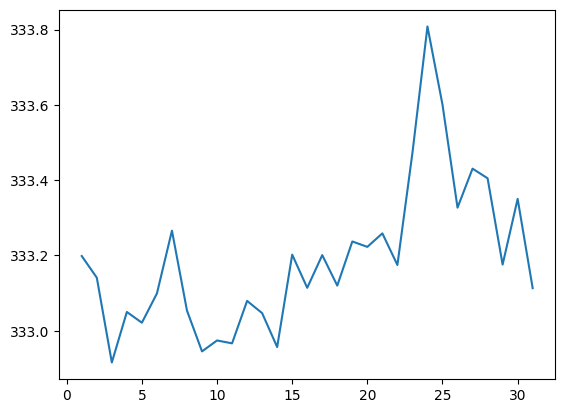

In [130]:
class Data:
   def __init__(self,data: dict, file: str, info):
      self.data = data
      self.info = info
      self.file = file
   def metadata(self):
      if self.file[:3] == 'tac':
         print('The location of this data set is Tacolneston, East Anglia.\nThe site code is TAC')
      if self.file[:3] == 'mhd':
         print('The location of this data set is Mace Head, W. coast of the Republic of Ireland.\nThe site code is MHD')
      row = self.info.loc[self.info['species'] == self.file[4:]]
  
      gas_species = row.iloc[0]['species']
      cali_scale = row.iloc[0]['scale']
      units = row.iloc[0]['units']

      print(f'the gas species is {gas_species} ')
      print(f'the scale used is {cali_scale} ')
      print(f'the units are {units} ')
      
      print(self.data[self.file])
   def run_avg(self, time_frame):
      self.time_frame = time_frame
      df_avg = self.data[self.file]
      #df_avg['time'] = pd.to_datetime(df_avg['time'])
      if self.time_frame == 'month':
            df_avg[self.time_frame] = df_avg['time'].dt.month
      elif self.time_frame == 'year':
         df_avg[self.time_frame] = df_avg['time'].dt.year
      elif self.time_frame == 'day':
         df_avg[self.time_frame] = df_avg['time'].dt.day
      else:
         print("Invalid time frame")
      grouped_df = df_avg.groupby(self.time_frame)
      avg_vals = grouped_df['mf'].mean()
      # print(avg_vals['day'].values)
      x = list(avg_vals.index)
      y  = []
      for i in x:
         y.append(avg_vals[i])
      return x, y
      


      #return avg_vals
      #print(avg_vals_day)
      #print(grouped_df)
      #df_avg.query[df_avg['time']>00:00:00 and df_avg['time']>23:00:00]
   def plot_run_avgs(self):
      x , y = self.run_avg(self.time_frame)
      fig, ax = plt.subplots()
      
      ax.plot(x, y)
      plt.show()
   

   
data_tac_mhd = Data(tac_mhd, 'tac_n2o',spec_info)
data_tac_mhd.run_avg('day')
data_tac_mhd.plot_run_avgs()

In [58]:
# class Data:
#  def __init__(self,data: dict):
#     self.tac_ch4 = data['tac_ch4']
    
#  def tac_metadata(self,species):
#     print(self.species)
# data_tac = Data(tac_mhd)
# data.tac_metadata(tac_mhd['tac_ch4'])